# Getting GSS Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
var_list = ['trust', 'age', 'sex', 'race', 'educ', 'relig', 'region']
output_filename = 'selected_gss_data.csv'

phase = 0

for k in range(3):
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet'
    print(url)
    df = pd.read_parquet(url)
    print(df.head())
    if phase == 0 :
        df.loc[:,var_list].to_csv(output_filename,
                                mode='w',
                                header=var_list,
                                index=False)
        phase = 1
    elif phase == 1 :
        df.loc[:,var_list].to_csv(output_filename,
                                mode='a',
                                header=None,
                                index=False)
        phase = 1

https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet
   year  id            wrkstat  hrs1  hrs2 evwork    occ  prestige  \
0  1972   1  working full time   NaN   NaN    NaN  205.0      50.0   
1  1972   2            retired   NaN   NaN    yes  441.0      45.0   
2  1972   3  working part time   NaN   NaN    NaN  270.0      44.0   
3  1972   4  working full time   NaN   NaN    NaN    1.0      57.0   
4  1972   5      keeping house   NaN   NaN    yes  385.0      40.0   

         wrkslf wrkgovt  ...  agehef12 agehef13 agehef14  hompoph wtssps_nea  \
0  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
1  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
2  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
3  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
4  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   

   wtssnrps_nea  wtssps_next wt

## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest. (You can also check out `get_gss.ipynb` for some processed data.)
2. Write a short description of the data you chose, and why. (~500 words)
3. Load the data using Pandas. Clean them up for EDA. Do this in this notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations.
5. Describe your findings. (500 - 1000 words, or more)

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.


In [3]:
df = pd.read_csv('selected_gss_data.csv')
df.head()

,trust,age,sex,race,educ,relig,region
0,depends,23.0,female,white,16.0,jewish,east north central
1,can trust,70.0,male,white,10.0,catholic,east north central
2,can't be too careful,48.0,female,white,12.0,protestant,east north central
3,can't be too careful,27.0,female,white,17.0,other,east north central
4,can't be too careful,61.0,female,white,12.0,protestant,east north central


For this lab we thought it would be interesting to explore the category of “trust”. In this dataset, the trust variable records the surveyors’ responses to the question “Generally speaking, would you say that most people can be trusted, or that you can’t be too careful when dealing with people?”. Trust is something that is very subjective, and can not be easily quantified by a person. For the GSS survey in 2022, however, trust was divided into three categories. These categories were "depends”, “can trust”, and “can’t be too careful”. One thing that we immediately noticed, and thought was interesting, was that there was no option for having no trust. Although the phrasing of “can’t be too careful” conveys a lack of trust, it does not indicate a complete loss of trust within a person. This could be seen as a limitation as it excludes respondents with cynical views. There were also some missing values for this variable as some did not choose to answer the question. The main question we wanted to explore within trust is whether there are different geographic factors that can contribute to a person being more trustworthy than not. In order to cover all major aspects of a person’s demographic we also looked at the responders age (age), sex (sex), race (race), education (educ), religion (relig), and region (region).

As outlined in the GSS codebook, trust is considered a “measure of social capital” which is the degree to which individuals feel they can rely on others in society. One limitation of the trust variable is that the “depends” answer is very ambiguous. Therefore, it is hard to make clear determinations as it does not align fully with trust or distrust. Trust can encompass many people from family to community to strangers. This survey focuses, though, on the generalized trust of most people. These responses can also be very dependent on external contextual factors of when the survey was conducted. We feel it is important to keep in mind that the data comes from a survey conducted in 2022. During 2022, there were still lingering societal impacts from the pandemic of COVID-19 in 2020. Due to this, the results could be skewed from people still feeling uneasy after this major world event.

Trust is not only a sociological concept, but also relevant to civic and political engagement. In American society today we see great polarization and wide misinformation campaigns leading to heightened levels of distrust between one another. Through analyzing the demographics of those reporting “can’t be too careful” we can interpret where divisional lines are in society and those that feel failed by our society. Trust and a person’s willingness to do so can reveal a lot about society and the need for social reform.


In [4]:
#Removing Blank or Unknown Answers
df.replace(['DK', 'NA', '', 'N/A'], pd.NA, inplace = True)

In [5]:
#Finding Trust Categories
df.trust.unique()

array(['depends', 'can trust', "can't be too careful", nan], dtype=object)

In [6]:
#Finding Range for Analysis
print(df.age.max())
print(df.age.min())

print(df.educ.max())
print(df.educ.min())

89.0
18.0
20.0
0.0


In [7]:
#Finding Regions
df.region.unique()

array(['east north central', 'west south central', 'east south atlantic',
       'west north central', 'new england', 'pacific', 'south atlantic',
       'middle atlantic', 'mountain'], dtype=object)

In [8]:
#Making Religion Easier to Work With
df.relig.unique()
religions = ['jewish', 'catholic', 'protestant', 'other', 'inter-nondenominational',
                'christian', 'muslim/islam', 'buddhism', 'orthodox-christian', 'native american',
                'hinduism', 'other eastern religions']

df['relig'] = df['relig'].where(df['relig'].isin(religions), 'Non-Religious')
df['relig'] = df['relig'].replace(religions, 'Religious')

df.head(15)

,trust,age,sex,race,educ,relig,region
0,depends,23.0,female,white,16.0,Religious,east north central
1,can trust,70.0,male,white,10.0,Religious,east north central
2,can't be too careful,48.0,female,white,12.0,Religious,east north central
3,can't be too careful,27.0,female,white,17.0,Religious,east north central
4,can't be too careful,61.0,female,white,12.0,Religious,east north central
5,can trust,26.0,male,white,14.0,Religious,east north central
6,can't be too careful,28.0,male,white,13.0,Religious,east north central
7,can trust,27.0,male,white,16.0,Religious,east north central
8,can't be too careful,21.0,female,black,12.0,Religious,west south central
9,can't be too careful,30.0,female,black,12.0,Religious,west south central


In [9]:
#Cleaning Education
df.educ.unique()

def ed_levels(years):
  if pd.isna(years):
    return None
  elif years < 12:
    return 'No High School Degree'
  elif years ==12:
    return 'High School Graduate'
  elif 13<=years<=15:
    return 'In College'
  elif years ==16:
    return 'College Graduate'
  else:
    return 'Postgraduate'

df['educ'] = df['educ'].apply(ed_levels)
df.educ.head()

,educ
0,College Graduate
1,No High School Degree
2,High School Graduate
3,Postgraduate
4,High School Graduate


**Data Visualization:**
Most of our variables are categorical therefore sticking to bar charts will be necesarry.
For age this is not the case with this variable boxplots, and other types of visualization can be used.



                       min  median   max
trust                                   
depends               18.0    44.0  89.0
can trust             18.0    46.0  89.0
can't be too careful  18.0    42.0  89.0


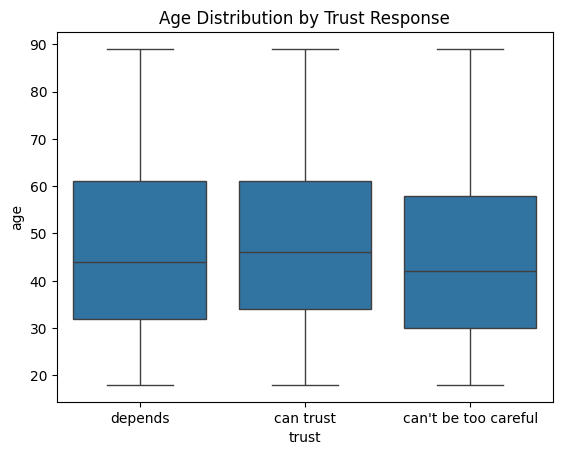

In [36]:
order = ["depends", "can trust", "can't be too careful"]

sns.boxplot(data=df, x="trust", y="age").set(title="Age Distribution by Trust Response")
stats=df.groupby('trust')['age'].agg(["min", "median", "max"]).reindex(order)
print(stats)

In [27]:
gdf = (df.loc[:,['trust','race'] ]).groupby(['trust','race']).size()
rdf = gdf.to_frame(name = 'size').reset_index()

,trust,race,size
0,can trust,black,949
1,can trust,other,544
2,can trust,white,14192
3,can't be too careful,black,4757
4,can't be too careful,other,1703


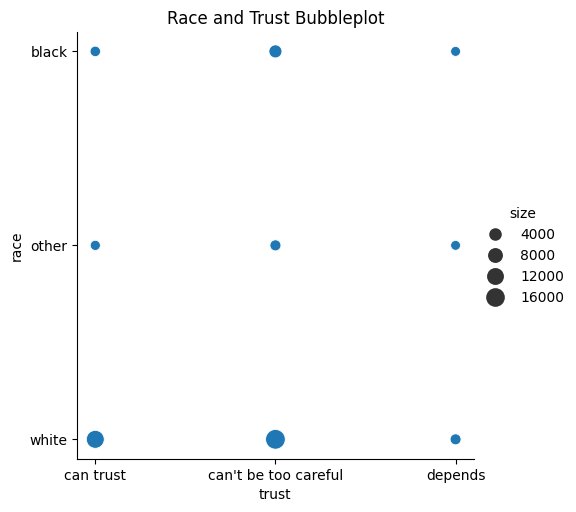

In [37]:
fig = sns.relplot(data = rdf, x='trust',y='race',size='size',sizes=(50,200))
fig.set(title="Race and Trust Bubbleplot", xlabel='trust', ylabel='race')

In [39]:
#How many people of each race have data?
df['race'].value_counts()

,count
race,
white,57657
black,10215
other,4411


<Axes: xlabel='race'>

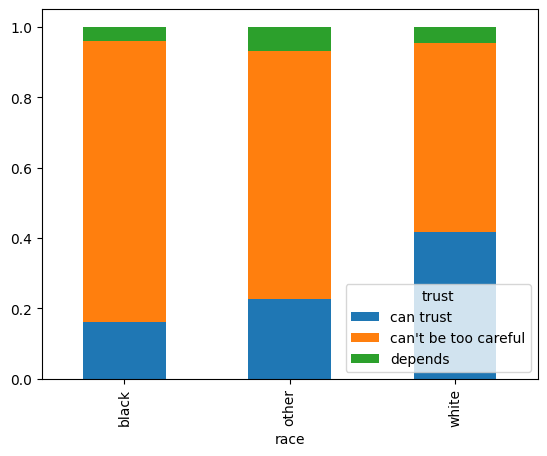

In [17]:
trust_race = pd.crosstab(df['race'], df['trust'], normalize='index')
trust_race.plot(kind="bar", stacked=True)


<Axes: xlabel='trust', ylabel='count'>

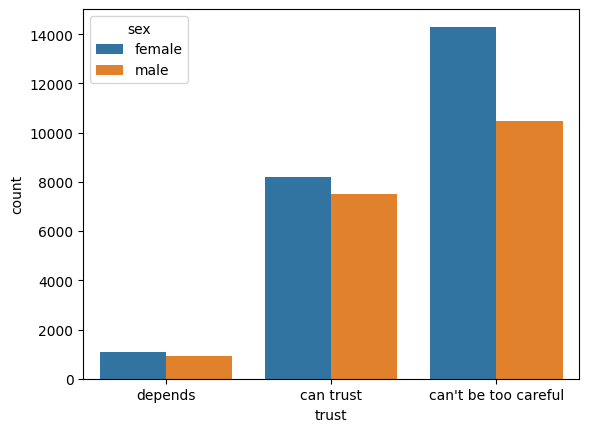

In [15]:
sns.countplot(data=df, x="trust", hue="sex")

# Visualization Results:

**Age:** With this comparison of trust to a numerical variable a box plot was used. All three plots span around the same age range with a maximum age for each trust value of 89 years and minimum of 18 years old. This allows the findings to be representative of a wide age range. There is a difference in the median values for each level of trust. Can trust (refering to society) has a median age of 46, depends has a median age of 44, with can't be to sure presenting a 42 median age. It is important to note that in the findings there is not big changes when it comes to age and trust. It is important to notice the slight change in median as within the 40s when you are in your late 40s it is slightly more common to have more trust then when you are in your younger 40s.

Race: First for race with checking the value counts for each category. Majority of the data collected comes from white people. Trying out a bubble plot knowing that the distribution of data by race is not equal instead of comparing findings between different races we will be looking at the trend within each category of race. First white. The largest bubble in the plot is under "Can't be too Careful", the middle size falls under the "Can trust" category. The smallest of them all is "depends" this signifies that majority of the white people data had a clear cut opinion. For the black respondents the bubble sizes are quite even with a slightly larger "can't be to careful" pool. This suggests a more even distribution of opinions. Finally the other races almost identical spreads.Importantly to note this category of race is the smallest. In addition to the bubble plot. We created a crosstab plot which clearly demonstrates that majority of the respondents no matter race lean towards not wanting to be too careful when it comes to trust.

Sex: Finally the count plot for sex has a similar trend to race where "Can't be too Carefull" was the most popular response. Females have the overall highest count in the category, even so this chart shows that both sexes are cautious when it comes to trust. "Depends" is the least selected option for both males and females. Overall this option is the least popular leading to the belief taht more people have a clear decision/opinion when it comes to trust. The "Can trust category for men and women again show women with more responses but and overall increase from "depends" while a decrease from the choice "Can't be too careful.
